# Upper Confidence Bound (UCB)

## Importing the libraries

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing the dataset

In [95]:
# CTR: click threw rate for the add
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [96]:
import math

# alle User
N = 10000
# Anzahl Ads
d = 10
# Liste der in jedem Druchlauf geklickten Ads
ads_selected = []
# wie of jede Anzeige insgesamt angezeigt wurde
numbers_of_selections = [0] * d
# Summe der Klicks pro Anzeige
sums_of_rewards = [0] * d
# Summe der Klicks für alle Anzeigen über alle Durchläufe
total_reward = 0

# Iteration über alle User
for n in range(0, N):
    # wird die Ad speichern, die in diesem Durchlauf angeklickt wurde
    ad = 0
    # hilft die potenziell beste Ad zu finden
    max_upper_bound = 0
    # Iteration pro User über alle Ads
    for i in range(0, d):
        # checkt, ob die Ad schon mal angeklickt wurde -> man würde sonst durch 0 teilen
        if numbers_of_selections[i] > 0:
            # Verhältnis wie oft die User auf die Ad geklickt haben zu allen angezeigten Ads
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            # Unsicherheits-Term: wird kleiner, je öfter die Ad getestet wurde
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            # Ad mit höchstem upper_bound Wert ist die Ad mit bester Performance
            upper_bound = average_reward + delta_i
            # Exploitation: Ad verwenden, die bisher viel angeklickt wurde, um viel Gewinn zu machen
            # Exploration: Neue Ad ausprobieren, welche noch nicht viel getestet wurde, da diese möglicherweise eine bessere Performance aufweist
        else:
        # in else kommt man hinein, wenn die Ad noch nie angeklickt wurde
            # der upper_bound Wert wird sehr hoch angesetzt, damit diese Ad die höchste Priorität hat, gewählt zu werden für den Durchlauf des aktuellen Users besitzt. Grund dafür, dass jede Ad einmal dem User gezeigt wird, bevor man sich auf getestete Ads stützt.
            upper_bound = 1e400
        # hier wird der höchste upper_bound bestimmt
        if upper_bound > max_upper_bound:
            # Ads, die noch nie angeklickt wurden (und im else statement landen) bekommen hier den max_upper_bound und werden beim nächsten User mit Sicherheit angezeigt
            max_upper_bound = upper_bound
            ad = i
    # aktuelle Ad nummer vom aktuellen User -> append(3)
    ads_selected.append(ad)
    # es wurde eine Ad mehr dem User ausgestrahlt
    numbers_of_selections[ad] += 1
    # hier wird Wert geklickt(1 || 0) gemerkt
    reward = dataset.values[n, ad]
    # anzahl Klicks pro Ad um reward value erhöhen
    sums_of_rewards[ad]  = sums_of_rewards[ad] + reward
    # alle Klicks Ad übergreifend um reward value erhöhen
    total_reward = total_reward + reward

## Visualising the results

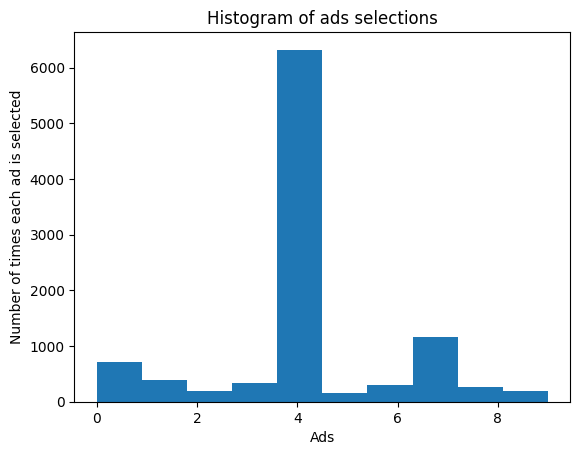

In [97]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad is selected')
plt.show()